## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as lng
import scipy.io as io
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pathlib import Path

## Load dataset

In [2]:
path = Path().cwd()
data_file = path.parent / "Data" / "zipdata.mat"
data = io.loadmat(data_file)


X = data['X']
y = data['y'].ravel()
N, P = X.shape

### 3. Load the zip data and fit bagged trees on the zip data. You should at least tune the number of models, as well as the individual models to obtain the best classification rates. Which tuning parameters are the most important for obtaining good performance with bagging?

In [4]:
# Try to experiment with max_samples, max_features, number of modles, and other what else you can consider
bagging = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, oob_score = True)


bagging_grid = GridSearchCV(estimator=bagging, param_grid = {'n_estimators': range(1,101)}, cv=5)

# Fit the grid search model
bagging_grid.fit(X, y)


print(f'best estimator: {bagging_grid.best_estimator_}')

c:\Users\musti\OneDrive - Danmarks Tekniske Universitet\Masters\Computational Data Analysis\CDA\Lib\site-packages\sklearn\ensemble\_bagging.py:865: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\musti\OneDrive - Danmarks Tekniske Universitet\Masters\Computational Data Analysis\CDA\Lib\site-packages\sklearn\ensemble\_bagging.py:871: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Users\musti\OneDrive - Danmarks Tekniske Universitet\Masters\Computational Data Analysis\CDA\Lib\site-packages\sklearn\ensemble\_bagging.py:865: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\musti\OneDrive - Danmarks Tekniske Universitet\Masters\Computational Data Analysis\CDA\Lib\site-packages\sklearn\ensemble\_bag

best estimator: BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=67,
                  oob_score=True)


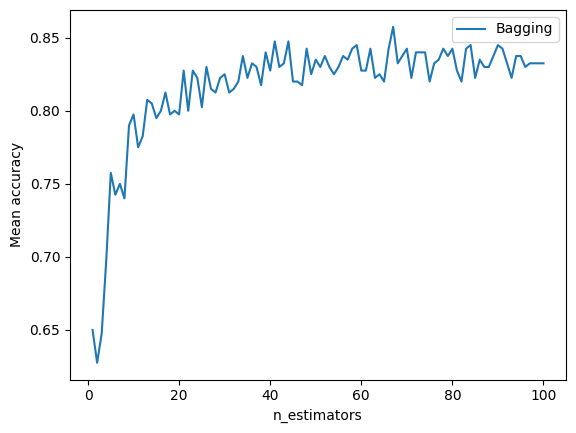

In [5]:
# --------------- Plots --------------- #
bagging_score = bagging_grid.cv_results_['mean_test_score']


plt.figure()
plt.plot(range(1,101), bagging_score, label='Bagging')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Mean accuracy')
plt.show()